In [ ]:
import psycopg2
import pandas as pd
import numpy as np

params = {
    "host"      : "localhost",
    "dbname"    : "flights",
    "user"      : "postgres",
    "password"  : "password",
    "port" : "5434"     
}

def func(host, dbname, user, password, port):
    return "connection successful"


x = func(host="localhost", dbname="flight", user="user", password="password", port="5434")
print(x)

# try-except
conn = psycopg2.connect(**params)

cursor = conn.cursor()
cursor.execute("""
SELECT *
FROM real_flight
WHERE cancelled = '0' and diverted = '0';
""")

rows = cursor.fetchall()
cursor.close()

In [4]:
# list comprehension
# new_list = [i for i in range(10) if i % 2 == 0]
# desc.name for desc in cursor.description
df = pd.DataFrame(rows, columns=[desc.name for desc in cursor.description])

In [5]:
# get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599268 entries, 0 to 599267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   day_of_month           599268 non-null  object
 1   day_of_week            599268 non-null  object
 2   op_unique_carrier      599268 non-null  object
 3   op_carrier_airline_id  599268 non-null  object
 4   op_carrier             599268 non-null  object
 5   tail_num               599268 non-null  object
 6   op_carrier_fl_num      599268 non-null  object
 7   origin_airport_id      599268 non-null  object
 8   origin_airport_seq_id  599268 non-null  object
 9   origin                 599268 non-null  object
 10  dest_airport_id        599268 non-null  object
 11  dest_airport_seq_id    599268 non-null  object
 12  dest                   599268 non-null  object
 13  dep_time               599268 non-null  object
 14  dep_del15              599268 non-null  object
 15  

In [6]:
# transform columns into ints
# https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.intc
df.astype({'arr_del15': 'int32', 'dep_del15': 'int32', 'cancelled': 'int32', 'diverted': 'int32', 'distance': 'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599268 entries, 0 to 599267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   day_of_month           599268 non-null  object
 1   day_of_week            599268 non-null  object
 2   op_unique_carrier      599268 non-null  object
 3   op_carrier_airline_id  599268 non-null  object
 4   op_carrier             599268 non-null  object
 5   tail_num               599268 non-null  object
 6   op_carrier_fl_num      599268 non-null  object
 7   origin_airport_id      599268 non-null  object
 8   origin_airport_seq_id  599268 non-null  object
 9   origin                 599268 non-null  object
 10  dest_airport_id        599268 non-null  object
 11  dest_airport_seq_id    599268 non-null  object
 12  dest                   599268 non-null  object
 13  dep_time               599268 non-null  object
 14  dep_del15              599268 non-null  int32 
 15  

<AxesSubplot:ylabel='Frequency'>

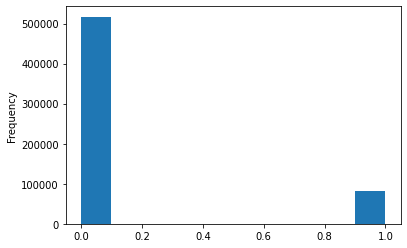

In [7]:
# exploration

# box plot of arr_del15
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
# df.boxplot("arr_del15")
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
df["arr_del15"].plot.hist()

In [ ]:
# box plot of dep_del15



In [ ]:
# histogram of origin airports



In [ ]:
# histogram of airlines



In [ ]:
# histogram of origin airports



In [ ]:
# check if our SQL query only kept rows that have `0` in diverted and `0` in cancelled
# if rows exist where cancelled or diverted is equal to 1, that the sql query didn't work
# print(df[df['diverted'] == "1"])

# checking if we have null values (even before we clean)
missing_rows_dep = df[df["dep_del15"].isna()]
print(len(missing_rows_dep))

missing_rows_arr = df[df["arr_del15"].isna()]
print(len(missing_rows_arr))

# df.dropna(subset=["arr_del15", "dep_del15"], inplace=True)

In [ ]:
df["delayed"] = np.where((df["arr_del15"] == '1') | (df["dep_del15"] == "1"), 1, 0)

# generate ratio for airline
airline_delays = df.groupby("op_unique_carrier")["delayed"].mean()
airline_delays.sort_values(inplace=True, ascending=False)

airline_delays.plot.bar()

In [ ]:
airport_delays = df.groupby("origin")["delayed"].mean()
airport_delays.sort_values(inplace=True, ascending=False)
airport_delays.plot.bar()